In [508]:
#importing important librarier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV

In [509]:
#loading File
df=pd.read_csv("wine.csv")

In [510]:
#Exploring Data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [511]:
df.shape

(1599, 12)

In [512]:
#the data has 1599 rows and 12 columns

In [513]:
#checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

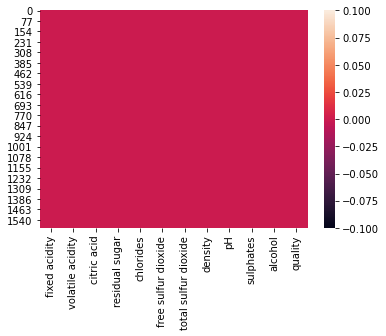

In [514]:
sns.heatmap(df.isnull())

In [515]:
#there is no null values in the data set

In [516]:
#checking unique values in the dependent data set since it is a classification problem
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [518]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [519]:
# the mean is greater then the median, henece there is some positive skewness in the dataset
#there are noticible difference between 75 percentile and max value, there are outliers in the dataset


<AxesSubplot:xlabel='quality', ylabel='count'>

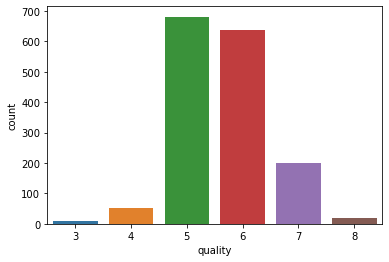

In [520]:
#EDA
#univariate analysis
#exploring the dependent variable
sns.countplot(data=df, x="quality")

In [521]:
#transforming quality variable in rating variblie 
#3,4=1
#5,6=2
#7,8=3
conditions=[
    (df["quality"] >= 7),
    (df["quality"] <= 4)
]
rating=[1,3]
df["rating"]=np.select(conditions,rating,default=2)
df.rating.value_counts()

2    1319
1     217
3      63
Name: rating, dtype: int64

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  rating                1599 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 156.3 KB


In [523]:
df.drop("quality",axis=1,inplace=True)

In [524]:
#this is a highly imbalanced dataset

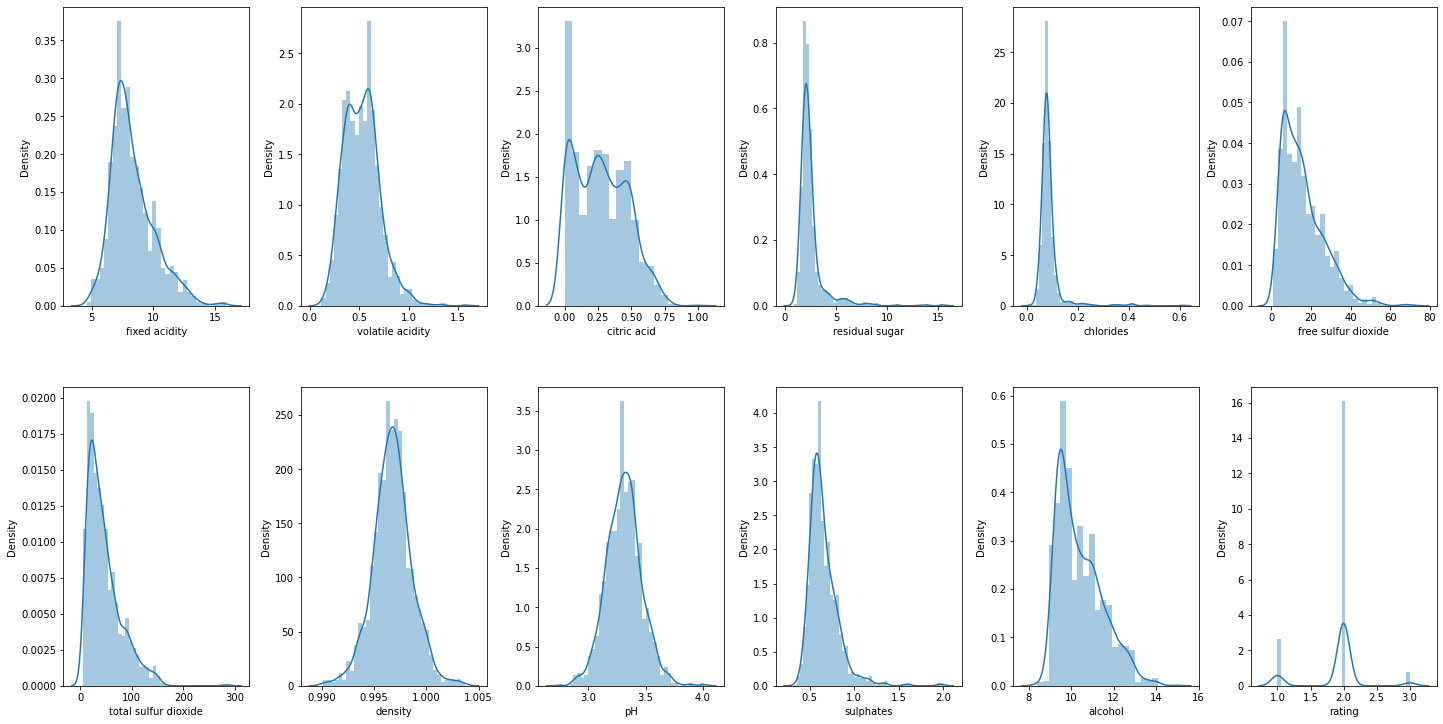

In [525]:
#ploting distplot
fig, ax=plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.distplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [526]:
#Majority of graphs showing normal distribution howeveralcohol and total sulfur dioxide is highly positive skewed
#there are huge outliers in variable residual sugar, chlorides, sulpahtes and total sulfur dioxide

<AxesSubplot:xlabel='rating', ylabel='fixed acidity'>

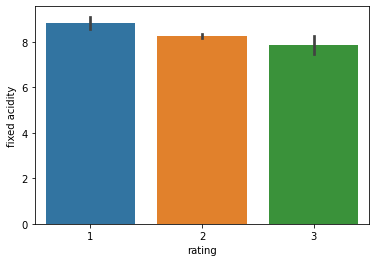

In [527]:
#Bivariate analysis
sns.barplot(x="rating", y="fixed acidity", data=df)

In [528]:
#the plot above is of fixed acidity with rating variable. here rating is decrisng  with increase in fixed acidity

<AxesSubplot:xlabel='rating', ylabel='volatile acidity'>

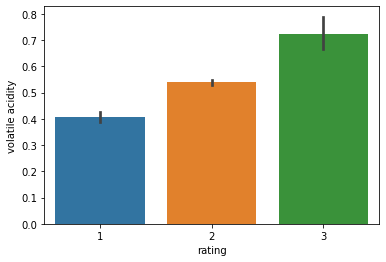

In [529]:
sns.barplot(x="rating", y="volatile acidity", data=df)

In [530]:
#the plot above is of vilatie acidity with rating variable. here the graph is following positive trend. with the increse in volatile acidity rating is decressing

<AxesSubplot:xlabel='rating', ylabel='citric acid'>

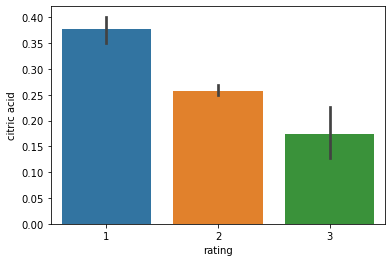

In [531]:
sns.barplot(x="rating", y="citric acid", data=df)

In [532]:
#the plot above is of citric acid with rating variable. here rating is decrisng  with increase in fixed acidity

<AxesSubplot:xlabel='rating', ylabel='residual sugar'>

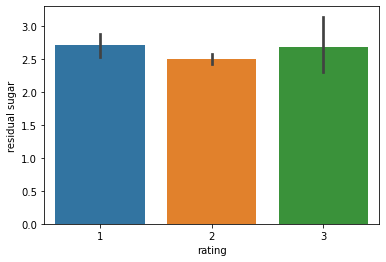

In [533]:
sns.barplot(x="rating", y="residual sugar", data=df)

In [534]:
#the plot above is of residual sugar with rating variable. here it seems thses two variable are lossely correlatd

<AxesSubplot:xlabel='rating', ylabel='chlorides'>

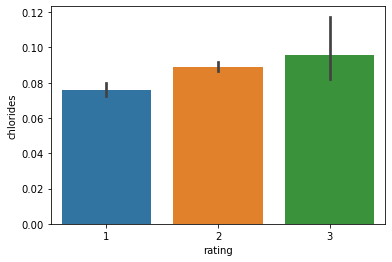

In [535]:
sns.barplot(x="rating", y="chlorides", data=df)

In [536]:
#the plot above is of chlorides with rating variable. here the graph is following positive trend. with the increse in chlorides rating is decressing

<AxesSubplot:xlabel='rating', ylabel='free sulfur dioxide'>

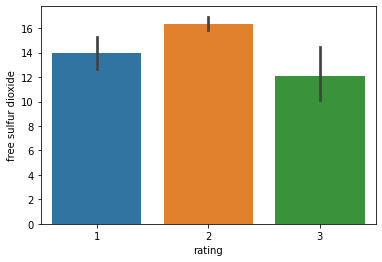

In [537]:
sns.barplot(x="rating", y="free sulfur dioxide", data=df)

In [538]:
#the plot above is of free sulfur dioxide with rating variable. here with the increase of free sulfur dioxide the 2nd rating wine is is increasing

<AxesSubplot:xlabel='rating', ylabel='total sulfur dioxide'>

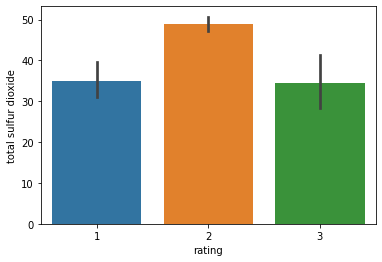

In [539]:
sns.barplot(x="rating", y="total sulfur dioxide", data=df)

In [540]:
#the plot above is of total sulfur dioxide with rating variable. here with the increase of total sulfur dioxide the 2nd rating wine is is increasing

<AxesSubplot:xlabel='rating', ylabel='density'>

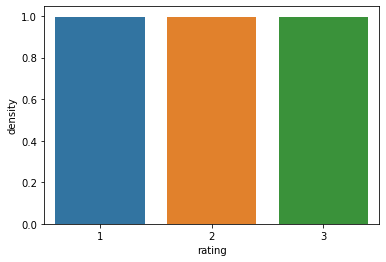

In [541]:
sns.barplot(x="rating", y="density", data=df)

In [542]:
#the plot above is of density with rating variable. these variables are loosely correlated

<AxesSubplot:xlabel='rating', ylabel='pH'>

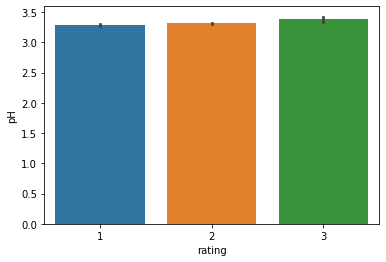

In [543]:
sns.barplot(x="rating", y="pH", data=df)

In [544]:
#the plot above is of ph with rating variable. these variables are loosely correlated

<AxesSubplot:xlabel='rating', ylabel='sulphates'>

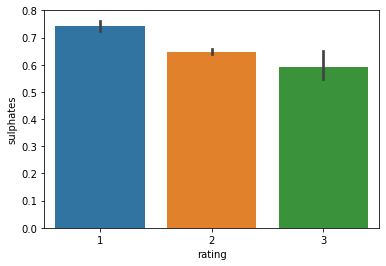

In [545]:
sns.barplot(x="rating", y="sulphates", data=df)

In [546]:
#the plot above is of sulpahte with rating variable. here the graph if following negative trend. with the increse in sulphate rating is decressing

<AxesSubplot:xlabel='rating', ylabel='alcohol'>

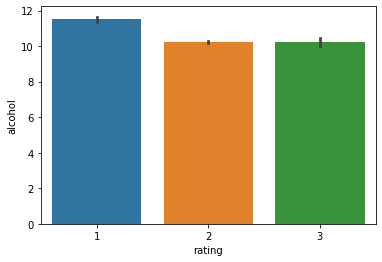

In [547]:
sns.barplot(x="rating", y="alcohol", data=df)

In [548]:
#the plot above is of alcohol with rating variable. here the graph if following negative trend. with the increse in alcohol rating is decrising

In [549]:
#using correlation fuction
cor=df.corr()

<AxesSubplot:>

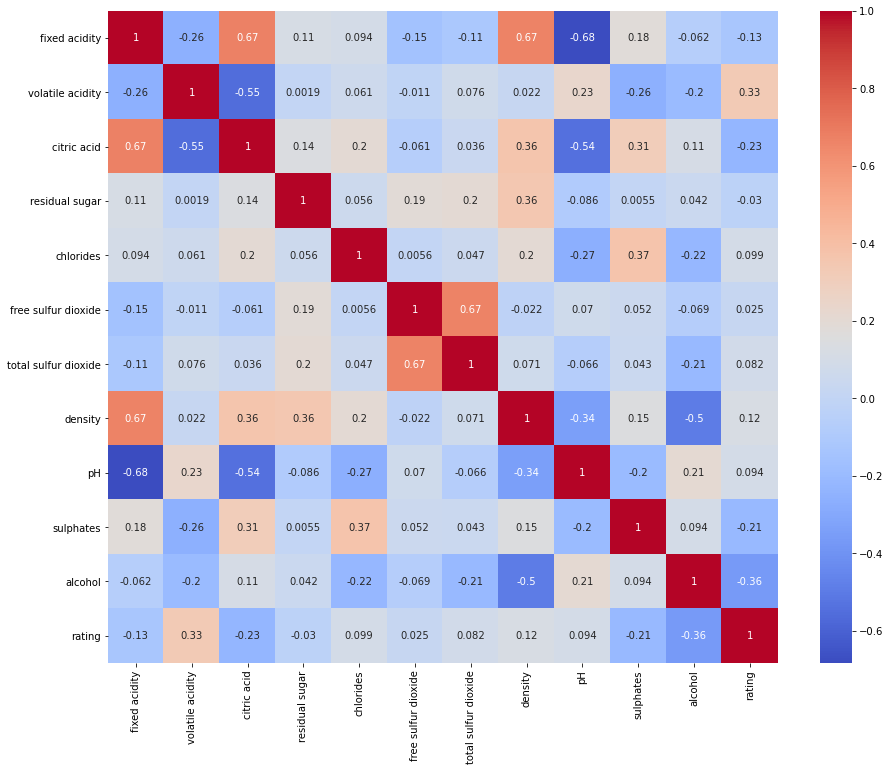

In [550]:
#using heatmap to show correlation
plt.figure(figsize=(15,12))
sns.heatmap(cor, annot=True, cmap="coolwarm")

In [551]:
# alcohol, sulphates,residual sugar,citric acid and fixed acidity is negatively correlates with rating , all other variables  is postively correlated correlated
#free sulfur dioxide, residual sugar are very less correlated with rating


In [552]:
#droping less correlated values
df.drop(["free sulfur dioxide", "residual sugar"],axis=1, inplace=True)

In [553]:
#ploting boxplot to see outliers

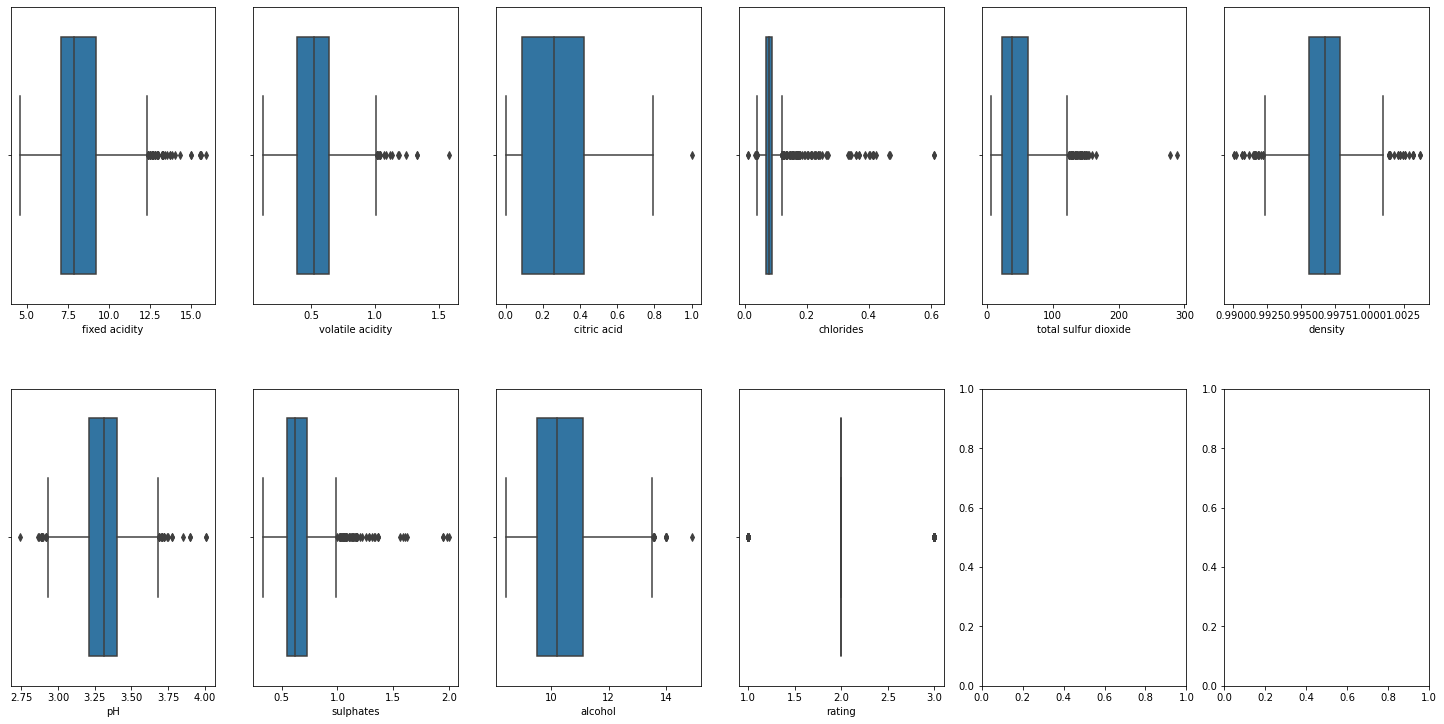

In [554]:
fig, ax=plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [555]:
#there are outliers in every columns

In [556]:
#using zscore to remove the outliers

In [557]:
from scipy.stats import zscore

In [558]:
z=np.abs(zscore(df))

In [559]:
df_new=df[(z<3).all(axis=1)]

In [560]:
df_new.shape ,df.shape

((1491, 10), (1599, 10))

In [561]:
#checking for skewnwss
df_new.skew()

fixed acidity           0.826471
volatile acidity        0.373826
citric acid             0.304587
chlorides               2.280811
total sulfur dioxide    1.142456
density                 0.062412
pH                      0.112774
sulphates               0.883909
alcohol                 0.760180
rating                 -0.753270
dtype: float64

In [562]:
#spliting the value in x and y to apply power transform
x=df_new.drop("rating", axis=1)

In [563]:
y=df_new["rating"]

In [564]:
x.shape, y.shape

((1491, 9), (1491,))

In [565]:
y=y.values.reshape(-1,1)

In [566]:
y.shape

(1491, 1)

In [567]:
#applying power transform
from sklearn.preprocessing import power_transform

In [568]:
df1=power_transform(x)

In [569]:
df1=pd.DataFrame(df1, columns=x.columns)

In [570]:
df1.skew()

fixed acidity           0.020185
volatile acidity        0.004693
citric acid             0.020065
chlorides              -0.111268
total sulfur dioxide   -0.007906
density                -0.000968
pH                     -0.000057
sulphates               0.023161
alcohol                 0.110788
dtype: float64

In [571]:
x=df1

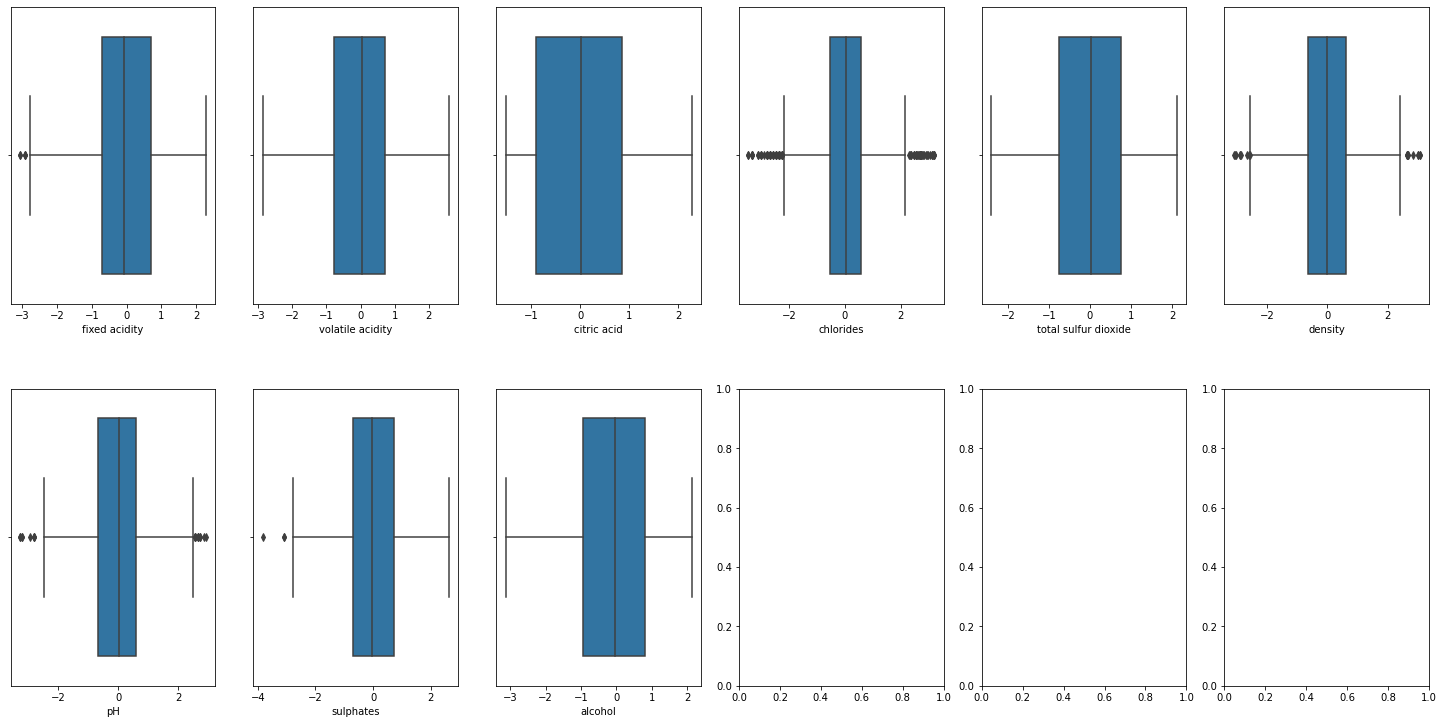

In [572]:

fig, ax=plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in x.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [573]:
# alot of outliers has been fixed. also the outliers present is in range

In [574]:
# as we have seen the dependent variable is highly imbalanced
#applying upscaling technique
from imblearn.over_sampling import SMOTE

In [575]:
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)

<AxesSubplot:ylabel='count'>

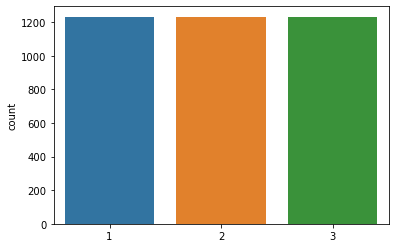

In [576]:
sns.countplot(y)

In [577]:
#the data is evenly balance now

In [578]:
#spliting the data in train test model 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)

In [579]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2587, 9), (1109, 9), (2587,), (1109,))

In [580]:
#creating function for the model and accuricy prediction
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))
    

In [581]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           1       0.88      0.91      0.90       374
           2       0.85      0.78      0.81       375
           3       0.89      0.94      0.92       360

    accuracy                           0.88      1109
   macro avg       0.88      0.88      0.88      1109
weighted avg       0.88      0.88      0.88      1109

The accuracy score is:  0.8764652840396754
The confusion matrix is:
    
     [[342  29   3]
 [ 46 292  37]
 [  1  21 338]]


In [582]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           1       0.92      0.97      0.94       374
           2       0.94      0.86      0.90       375
           3       0.94      0.98      0.96       360

    accuracy                           0.93      1109
   macro avg       0.93      0.93      0.93      1109
weighted avg       0.93      0.93      0.93      1109

The accuracy score is:  0.9341749323715058
The confusion matrix is:
    
     [[361  12   1]
 [ 31 323  21]
 [  0   8 352]]


In [583]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           1       0.87      0.92      0.89       374
           2       0.88      0.74      0.81       375
           3       0.88      0.98      0.93       360

    accuracy                           0.88      1109
   macro avg       0.88      0.88      0.87      1109
weighted avg       0.88      0.88      0.87      1109

The accuracy score is:  0.8764652840396754
The confusion matrix is:
    
     [[343  28   3]
 [ 53 277  45]
 [  0   8 352]]


In [584]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           1       0.78      0.83      0.80       374
           2       0.59      0.46      0.52       375
           3       0.64      0.74      0.68       360

    accuracy                           0.68      1109
   macro avg       0.67      0.68      0.67      1109
weighted avg       0.67      0.68      0.67      1109

The accuracy score is:  0.6753832281334535
The confusion matrix is:
    
     [[311  33  30]
 [ 80 173 122]
 [ 10  85 265]]


In [585]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           1       0.83      0.98      0.90       374
           2       0.97      0.64      0.77       375
           3       0.86      1.00      0.92       360

    accuracy                           0.87      1109
   macro avg       0.89      0.87      0.87      1109
weighted avg       0.89      0.87      0.87      1109

The accuracy score is:  0.872858431018936
The confusion matrix is:
    
     [[368   6   0]
 [ 75 241  59]
 [  0   1 359]]


In [586]:
#ExtraTreeClassifier
model(ExtraTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           1       0.86      0.91      0.88       374
           2       0.86      0.76      0.80       375
           3       0.88      0.93      0.90       360

    accuracy                           0.86      1109
   macro avg       0.86      0.86      0.86      1109
weighted avg       0.86      0.86      0.86      1109

The accuracy score is:  0.8638412984670875
The confusion matrix is:
    
     [[341  25   8]
 [ 53 284  38]
 [  4  23 333]]


In [587]:
#using cross validation on all the model 

In [588]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.8452437552572871


In [589]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.9082686610832752


In [590]:
print(cross_val_score(SVC(),x,y,cv=5).mean())

0.8392755001280034


In [591]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.6336481000621731


In [592]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean())

0.8354873276524157


In [593]:
print(cross_val_score(ExtraTreeClassifier(),x,y,cv=5).mean())

0.8243992978093114


In [594]:
#he best model is RandomTreeClassifier

In [595]:
#setting parameter for hypertuning
parameter={"max_depth":np.arange(2,10),
          "criterion":["gini","entropy"],
           } 

In [596]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [597]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [598]:
#checking best parameters
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [599]:
#building final model
best_model=RandomForestClassifier(criterion="entropy", max_depth=9)

In [600]:
best_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [601]:
pred=best_model.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test,pred))

The accuracy score is:  0.9179440937781785


In [602]:
#savingThemodel

In [603]:
import joblib
joblib.dump(best_model,"WineQuality.pkl")

['WineQuality.pkl']